# Book Statistics

The books used are from the Project Gutenberg, the oldest digital library of books that are free to download and read. Though, I used only 4 books here.


In [138]:
def count_words(text):
    """
    Count the number of times each word occures in text (str). Returns a dictionary where
    keysare unique words and value are word counts. skips ponctuations
    """
    text = text.lower()
    skips = [".", ",", ";", "'", '"',":"]
    for ch in skips:
        text = text.replace(ch, "")
        
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

In [139]:
from collections import Counter

def count_words_fast(text):
    """
    Count the number of times each word occures in text (str). Returns a dictionary where
    keysare unique words and value are word counts. skips ponctuations
    """
    text = text.lower()
    skips = [".", ",", ";", "'", '"',":"]
    for ch in skips:
        text = text.replace(ch, "")
        
    word_counts = {}
    word_counts = Counter(text.split(" "))
    return word_counts

In [140]:
text = "python is cool"

let's see if both functions return the same result

In [141]:
count_words(text)

{'cool': 1, 'is': 1, 'python': 1}

In [142]:
count_words_fast(text)

Counter({'cool': 1, 'is': 1, 'python': 1})

In [143]:
count_words_fast(text) == count_words(text)

True

In [144]:
def read_book(title_path):
    """
    Read a book and return it as a string
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [145]:
text = read_book("./books/English/shakespeare/romeo-and-juliet.txt")

In [146]:
len(text)

160952

Let's get the index of a famous sentence from Romeo and Juliet:

In [147]:
ind = text.find("What's in a name?")

In [148]:
ind

50859

Now, we'll get a sample text from the index ind, followed by 1000 characters:

In [149]:
sample_text = text[ind: ind+1000]

In [150]:
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [151]:
len(sample_text)

1000

In [152]:
def word_stats(word_counts):
    """
    Return number of unique words and word frequencies.
    """
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [153]:
word_counts = count_words(text) 
(num_unique, counts) = word_stats(word_counts)
print("Romeo and Juliet:")
print("number of unique words:",num_unique,", total word frequencies: ",sum(counts))

Romeo and Juliet:
number of unique words: 4906 , total word frequencies:  39389


In [154]:
text = read_book("./books/German/shakespeare/romeo-und-julia-german.txt")

In [155]:
word_counts = count_words(text)
(num_uniques, counts) = word_stats(word_counts)
print("German version of Romeo and Juliet:")
print("number of unique words:",num_uniques,", total word frequencies: ",sum(counts))

German version of Romeo and Juliet:
number of unique words: 7525 , total word frequencies:  20311


Reading Multiple Files:

In [156]:
import os
import pandas as pd

In [157]:
book_dir = "./books"
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1 

In [158]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir +"/"+ language):
        for title in os.listdir(book_dir +"/"+ language +"/" + author):
            inputfile = book_dir + "/" + language + "/" +author +"/" +title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            print("number of unique words:",num_unique,", total word frequencies: ",sum(counts))
            stats.loc[title_num]=language, author.capitalize(),title.replace("txt",""), sum(counts), num_unique 
            title_num +=1

./books/English/shakespeare/romeo-and-juliet.txt
number of unique words: 4906 , total word frequencies:  39389
./books/English/twain/The-Adventures-of-Tom-Sawyer.txt
number of unique words: 14260 , total word frequencies:  66944
./books/German/kafka/Die-Verwandlung.txt
number of unique words: 5843 , total word frequencies:  20613
./books/German/shakespeare/romeo-und-julia-german.txt
number of unique words: 7525 , total word frequencies:  20311


In [159]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,romeo-and-juliet.,39389,4906
2,English,Twain,The-Adventures-of-Tom-Sawyer.,66944,14260
3,German,Kafka,Die-Verwandlung.,20613,5843
4,German,Shakespeare,romeo-und-julia-german.,20311,7525


In [160]:
stats.title

1                romeo-and-juliet.
2    The-Adventures-of-Tom-Sawyer.
3                 Die-Verwandlung.
4          romeo-und-julia-german.
Name: title, dtype: object

In [161]:
stats["unique"]

1     4906
2    14260
3     5843
4     7525
Name: unique, dtype: float64

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

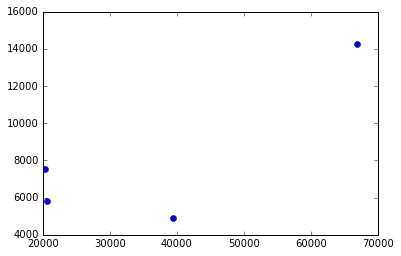

In [163]:
plt.plot(stats.length, stats.unique, "bo");

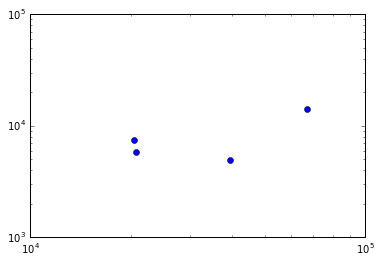

In [164]:
plt.loglog(stats.length, stats.unique, "bo");

stratify data

In [165]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,romeo-and-juliet.,39389,4906
2,English,Twain,The-Adventures-of-Tom-Sawyer.,66944,14260


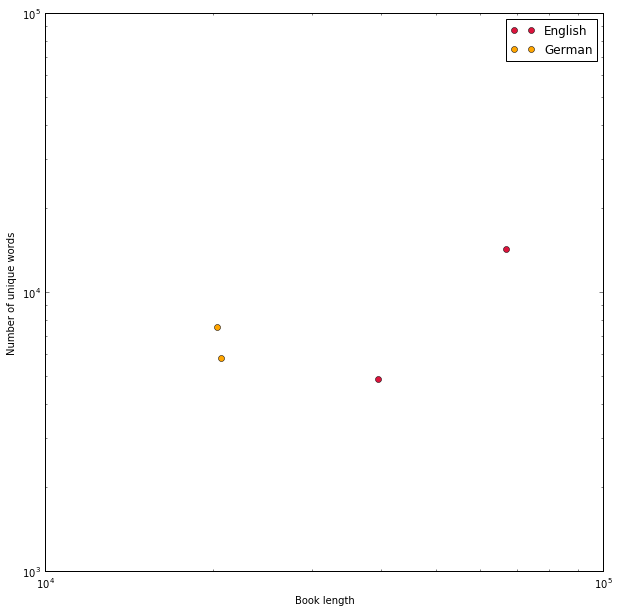

In [167]:
plt.figure(figsize=(10,10))
subset = stats[stats.language =="English"]
plt.loglog(subset.length, subset.unique, "o", label="English", color ="crimson")

subset = stats[stats.language =="German"]
plt.loglog(subset.length, subset.unique, "o", label="German", color ="orange")

plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")